In [52]:
%matplotlib inline

import re

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

from readability import Document
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException

from wordcloud import WordCloud

In [2]:
data_file = 'common_crawl.csv'
df = pd.read_csv(data_file)

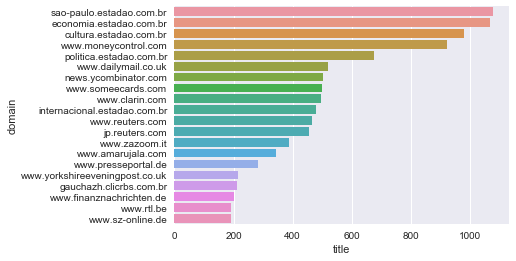

In [53]:
per_domain = df.groupby(['domain']).count().reset_index()\
    .sort_values(['title'], ascending=False).iloc[:20]
sns.barplot(y='domain', x='title', data=per_domain)

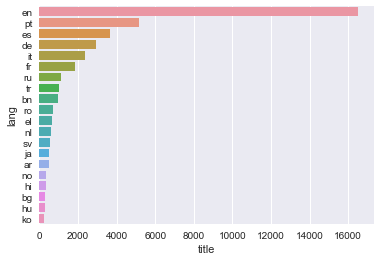

In [54]:
per_language = df.groupby(['lang']).count().reset_index()\
    .sort_values(['title'], ascending=False).iloc[:20]
sns.barplot(y='lang', x='title', data=per_language)

In [55]:
top_langs = per_language.head(10)['lang'].tolist()

top_lang_df = df[df['lang'].isin(top_langs)]
top_lang_df['words'] = top_lang_df['words'].fillna('')
data_dict = dict()
for n, g in top_lang_df.groupby(['lang']): 
    text = g['words'].str.cat(sep=' ')
    wordcloud = WordCloud().generate(text)
    vectorizer = CountVectorizer()
    counts = vectorizer.fit_transform(g['words'].tolist())
    words = vectorizer.get_feature_names()
    counts = counts.toarray().sum(axis=0)
    top_n_words = sorted(zip(words, counts), key=lambda x: x[1], reverse=True)[:20]
    data = pd.DataFrame({'words': [x[0] for x in top_n_words],
                         'counts': [x[1] for x in top_n_words]})
    data_dict[n] = data, wordcloud

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


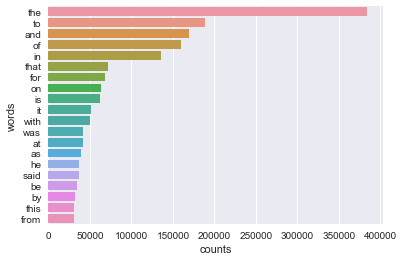

In [56]:
sns.barplot(y='words', x='counts', data=data_dict['en'][0])

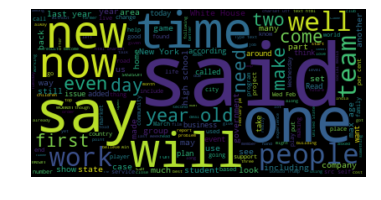

In [57]:
plt.imshow(data_dict['en'][1], interpolation='bilinear')
plt.axis("off")
plt.show()

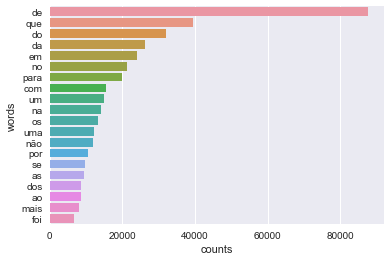

In [58]:
sns.barplot(y='words', x='counts', data=data_dict['pt'][0])

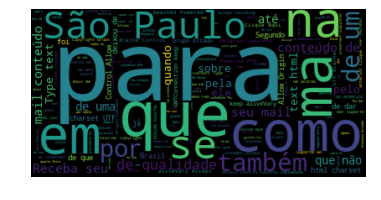

In [67]:
plt.imshow(data_dict['pt'][1], interpolation='bilinear')
plt.axis("off")
plt.show()

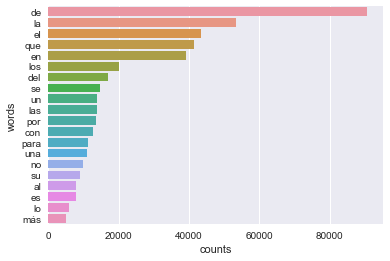

In [60]:
sns.barplot(y='words', x='counts', data=data_dict['es'][0])

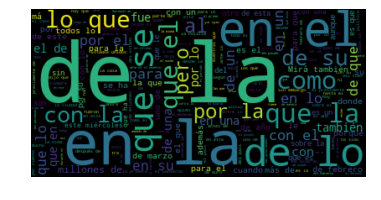

In [61]:
plt.imshow(data_dict['es'][1], interpolation='bilinear')
plt.axis("off")
plt.show()

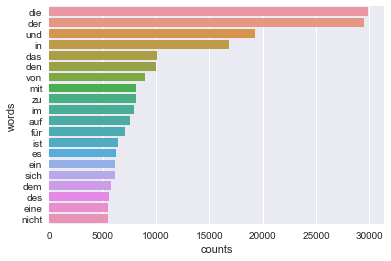

In [63]:
sns.barplot(y='words', x='counts', data=data_dict['de'][0])

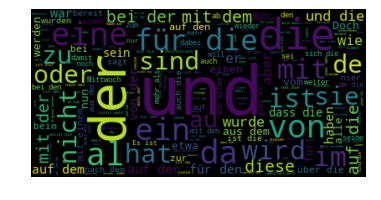

In [64]:
plt.imshow(data_dict['de'][1], interpolation='bilinear')
plt.axis("off")
plt.show()

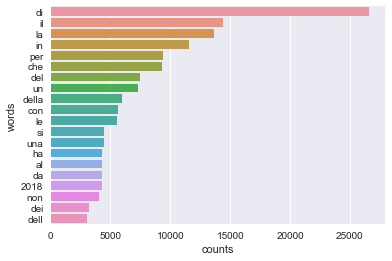

In [65]:
sns.barplot(y='words', x='counts', data=data_dict['it'][0])



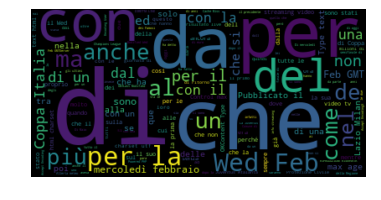

In [66]:
plt.imshow(data_dict['it'][1], interpolation='bilinear')
plt.axis("off")
plt.show()